In [1]:
import os
import sys
sys.path.append('utils')
from dataset.spot import DailyDataset, get_loader, TOTAL_STD, TOTAL_MEAN
from tool import to_gpu
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import types

%matplotlib inline

/home/xurenchao/install/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/xurenchao/install/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/xurenchao/install/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from gated_model import GatedRNN as Model

In [12]:
dataset = DailyDataset(N=2000, W=14)
loader = get_loader(dataset, batch_size=64, shuffle=True, num_workers=2)

Data build range: [window(2010-06-20 00:00:00) - 2010-07-11 00:00:00, 2015-12-31 00:00:00]


In [13]:
trainX, trainY = dataset.get_io('2011-06-30', '2015-12-31')
testX, testY = dataset.get_io('2011-06-30', '2016-06-30')
testY_ = testY
with torch.no_grad():
    test_period_input = to_gpu(testX)
#     self_test_input = to_gpu(testX[:trainX.size()[0] + 1])

In [14]:
PATH = './runs/test/'
run = 'res_rnn_2'
# model = to_gpu(Model(n_input=14*24,n_hidden=256,n_layers=4,n_output=24))
# model = to_gpu(Model(n_input=14*24,n_hidden=256,dilation=[1,4,7,1],n_output=24, cell_type='GRU'))
model = to_gpu(Model(input_dim=24, output_dim=24, hidden_size=64, hard_gate=1))

# model = to_gpu(Model(n_input=24, n_hidden=64, n_output=24, cell_type='GRU', k=4,))
model.load_state_dict(torch.load(os.path.join(PATH, run, 'snapshots20.pth')))

In [15]:
182*24*0.0005*TOTAL_STD

49.646688000000005

In [16]:
a=[x for x in range(0, 24*182)]
b=torch.zeros_like(test_period_input)
b[-182:,:]=torch.Tensor(a).reshape(182,24)*0.0005

In [17]:
c=[x for x in range(1, 24*182+1)]
d=torch.zeros_like(testY)
d[-182:,:]=torch.Tensor(c).reshape(182,24)*0.0005

In [18]:
add_trend=0
if add_trend:
    test_period_output= model.forecast(test_period_input+b)
    testY = testY_ + d
else:
    test_period_output= model.forecast(test_period_input)
    testY = testY_

In [19]:
# tmp = test_period_output[1].cpu().detach().numpy()
# df = pd.DataFrame(tmp)
# df.to_csv(PATH +"day.csv")

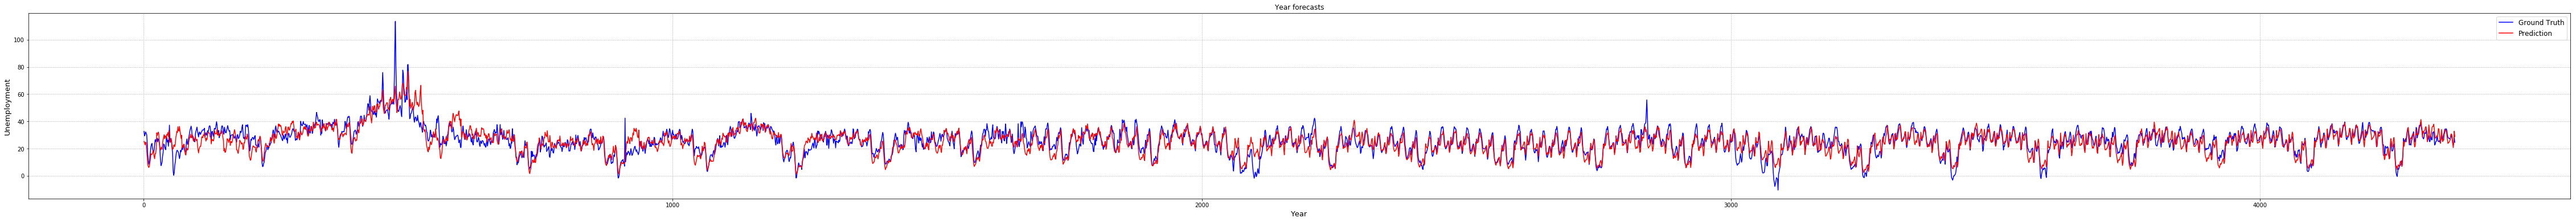

In [20]:
y_pred = torch.reshape(test_period_output[0].cpu(),(1848*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-182*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-182*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

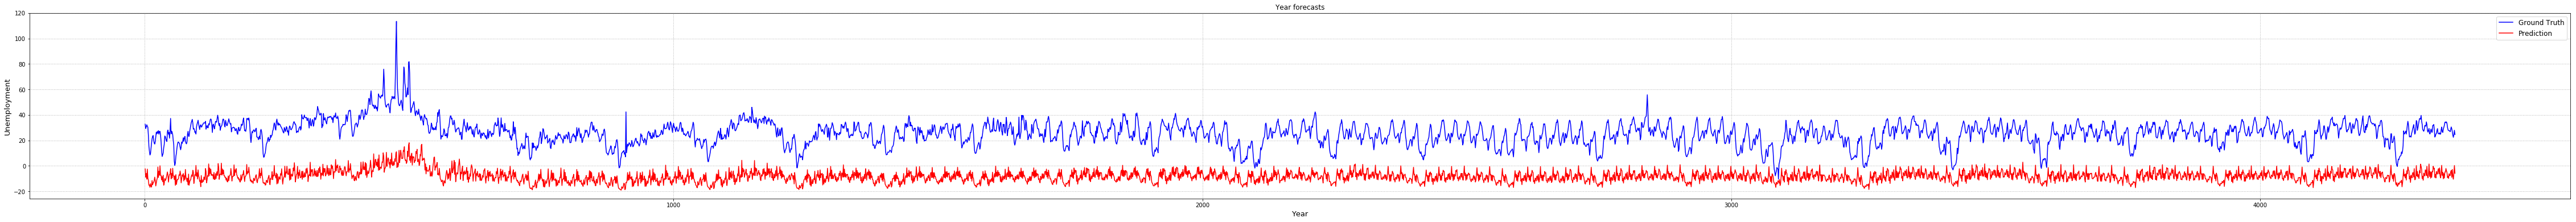

In [21]:
y_pred = torch.reshape(test_period_output[1].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-182*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-182*24:], color='red', label='Prediction')
# x=np.linspace(1, 60*24, 60*24)
# plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

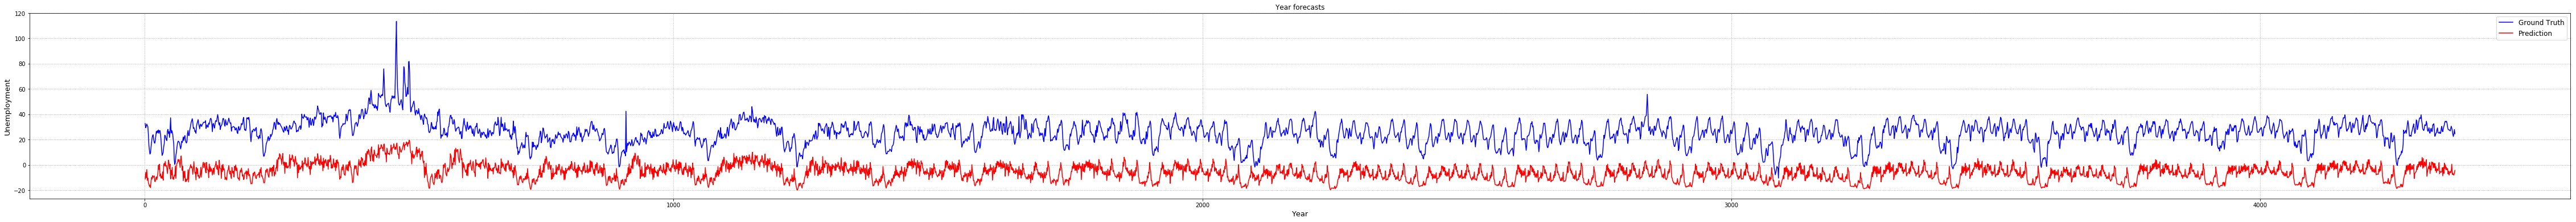

In [22]:
y_pred = torch.reshape(test_period_output[2].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-182*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-182*24:], color='red', label='Prediction')
# x=np.linspace(1, 60*24, 60*24)
# plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

In [23]:
y_pred = torch.reshape(test_period_output[3].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-182*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-182*24:], color='red', label='Prediction')
# x=np.linspace(1, 60*24, 60*24)
# plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

IndexError: tuple index out of range

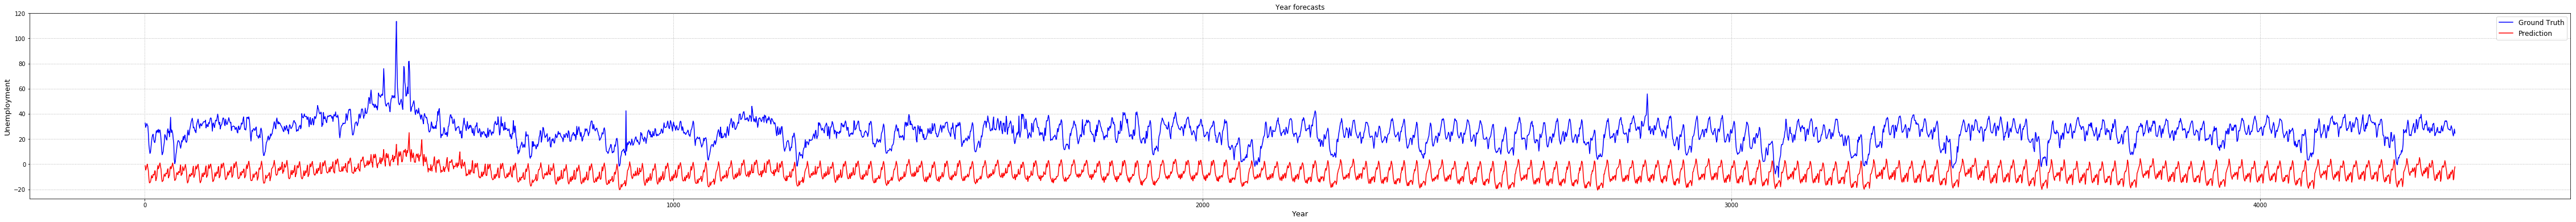

In [27]:
y_pred = torch.reshape(test_period_output[1].cpu()+test_period_output[2].cpu(),(1848*24,)).detach().numpy()* TOTAL_STD# + TOTAL_MEAN
y = torch.reshape(testY,(1848*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
plt.figure(figsize=(80,6))
x=np.linspace(1, 182*24, 182*24)
plt.plot(x, y[-182*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-182*24:], color='red', label='Prediction')
# x=np.linspace(1, 60*24, 60*24)
# plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
# plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()